In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

In [16]:
gdp_df = pd.read_csv(r"C:\Users\jason\nss\dq1-undata-jasonamyers\data\gdp_per_capita.csv", skipfooter=2,)

<ipython-input-16-52d9a3979e3f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv(r"C:\Users\jason\nss\dq1-undata-jasonamyers\data\gdp_per_capita.csv", skipfooter=2,)


In [17]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [18]:
del gdp_df['Value Footnotes']

In [19]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [26]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [95]:
gdp_df['Year'].value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [32]:
gdp_df['Country'].value_counts()

Tonga                              29
Sub-Saharan Africa (IDA & IBRD)    29
The Gambia                         29
Pre-demographic dividend           29
The Bahamas                        29
                                   ..
Nauru                              12
Sint Maarten (Dutch part)           9
Turks and Caicos Islands            8
South Sudan                         8
Djibouti                            1
Name: Country, Length: 243, dtype: int64

In [ ]:
243, See cell above, newer countries and new to reporting GDP

Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [33]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

Use .describe() to find the summary statistics for GDP per capita in 2014.

In [39]:
gdp_2014['GDP_Per_Capita'].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64

Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

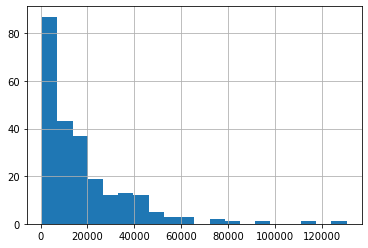

In [38]:
gdp_2014['GDP_Per_Capita'].hist(bins=20)

Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [44]:
 gdp_2014.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [85]:
gdp_pivoted = gdp_df.pivot_table(columns=['Year'], index=['Country'], values='GDP_Per_Capita')[[1990, 2018]].dropna()

Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [86]:
gdp_pivoted['Percent_Change'] = gdp_pivoted.apply(lambda x: (100*(x[2018]-x[1990]))/x[1990], axis=1)

In [87]:
gdp_pivoted

Year,1990,2018,Percent_Change
Country,,,
Albania,4458.247115,12316.071501,176.253675
Algeria,10300.015042,13737.356063,33.372194
Angola,4761.229638,5725.327238,20.248920
Antigua and Barbuda,17454.549799,23840.729896,36.587481
Arab World,10491.507721,15590.398354,48.600170
...,...,...,...
Vietnam,1457.594613,6608.621686,353.392296
World,8966.014072,15914.172172,77.494392
Yemen,3425.707169,2284.970504,-33.299305


How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [94]:
len(gdp_pivoted[gdp_pivoted['Percent_Change'] < 0])

17

Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [97]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False)

Year,1990,2018,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,20181.132964,1882.888987
China,1521.963868,16181.777716,963.216943
Myanmar,730.228038,5922.023358,710.982741
East Asia & Pacific (excluding high income),2222.407152,14297.925500,543.353109
East Asia & Pacific (IDA & IBRD),2246.661835,14448.235227,543.097907
...,...,...,...
Yemen,3425.707169,2284.970504,-33.299305
Venezuela,14619.454190,9401.622748,-35.691014
Burundi,1027.396660,660.330341,-35.727809


In [111]:
gdp_pivoted_top_two_all_years = gdp_df.pivot_table(columns=['Year'], index=['Country'], values='GDP_Per_Capita').dropna().loc[['Equatorial Guinea', 'China']]

In [118]:
gdp_pivoted_top_two_all_years.loc[:,1990]

Country
Equatorial Guinea    1017.764136
China                1521.963868
Name: 1990, dtype: float64

In [119]:
gdp_pivoted_top_two_all_years.plot(kind='line', x='Year', y=)

KeyError: 'Year'